In [99]:
import pandas as pd

df = pd.read_csv('./Real_Estate_Data.csv')
df

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


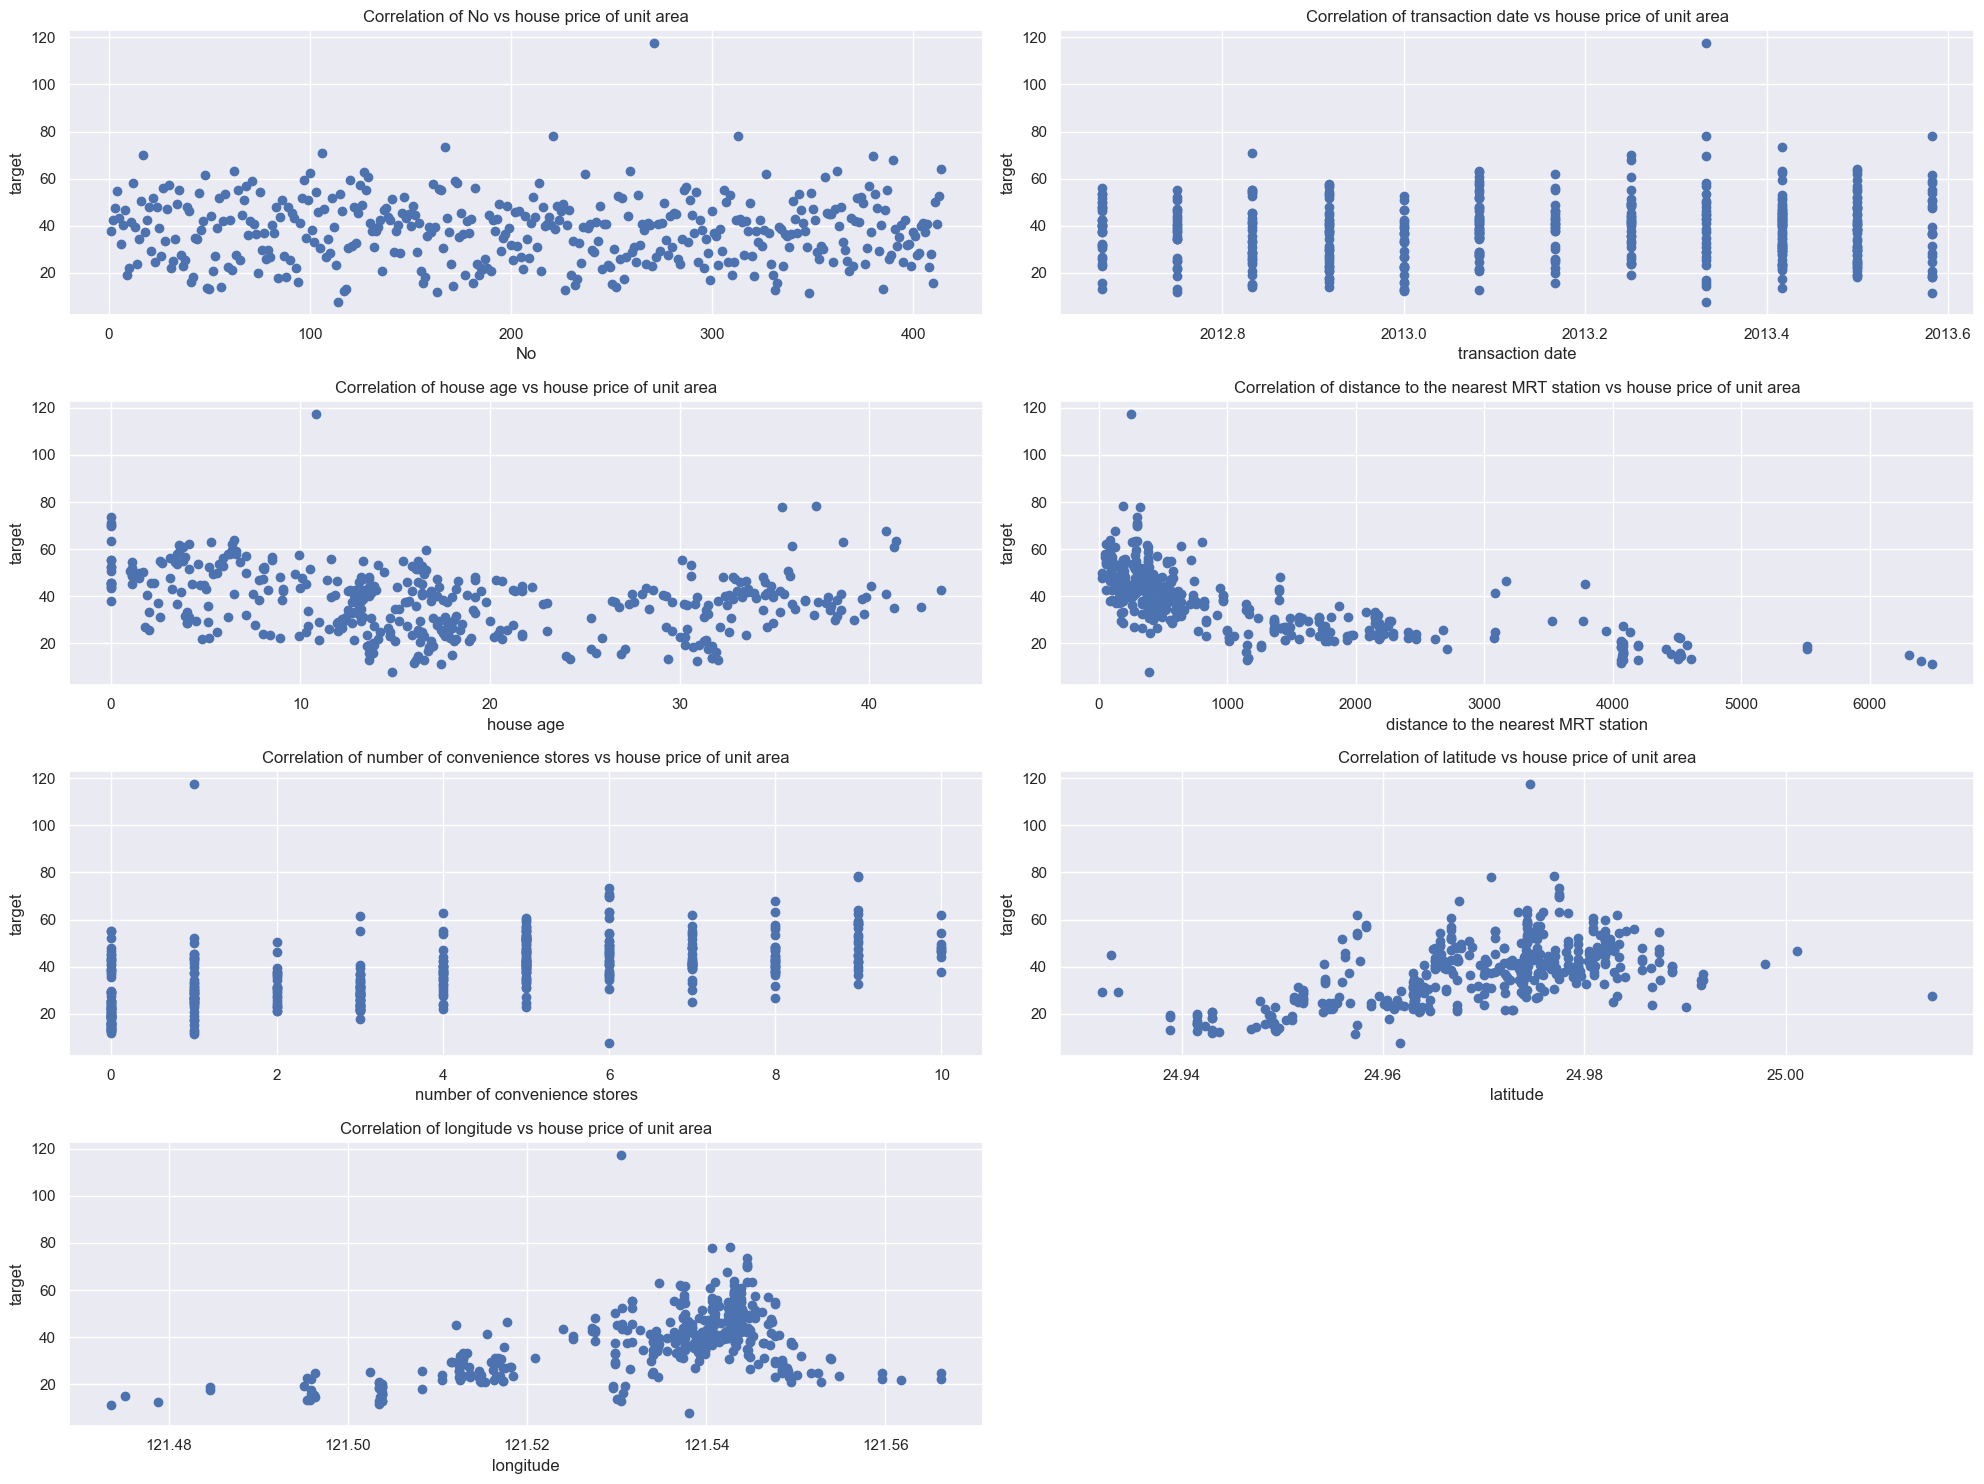

In [100]:
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Loop through each feature and create a scatter plot
for i, feature in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 2, i)
    plt.scatter(x=df[feature], y=df['house price of unit area'])
    plt.title(f'Correlation of {feature} vs house price of unit area')
    plt.xlabel(f'{feature}')
    plt.ylabel('target')
    plt.tight_layout()

plt.show()

In [101]:

# Drop the specified columns from df
df_clean = df.drop(columns=["No", "transaction date"])

# Standardize the remaining features in df_features
df_clean = (df_clean - df_clean.mean()) / df_clean.std()
df_clean

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1.254111,-0.791537,2.004982,1.124070,0.448220,-0.005894
1,0.156896,-0.615866,1.665488,0.911342,0.400654,0.310132
2,-0.387322,-0.413515,0.307513,1.485063,0.687352,0.684953
3,-0.387322,-0.413515,0.307513,1.485063,0.687352,1.236161
4,-1.115873,-0.549332,0.307513,0.833180,0.592220,0.376277
...,...,...,...,...,...,...
409,-0.352211,2.375490,-1.389957,-2.214314,-1.925506,-1.659517
410,-1.063206,-0.787118,1.665488,0.427062,0.634573,0.883388
411,0.095452,-0.549014,0.986500,0.821899,0.423460,0.192541
412,-0.843763,-0.775745,0.307513,-0.184532,0.476238,1.067124


(414, 1)
(414,)


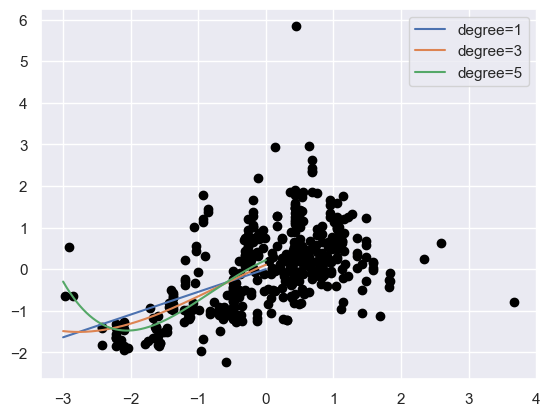

In [102]:
import numpy as np
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X = np.array(df_clean['latitude']).reshape(-1, 1)
print(X.shape)

y = np.array(df_clean['house price of unit area'])
print(y.shape)

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(StandardScaler(),
                         PolynomialFeatures(degree),
                         LinearRegression(**kwargs))


X_test = np.linspace(-3, 0, 1000)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.legend(loc='best');

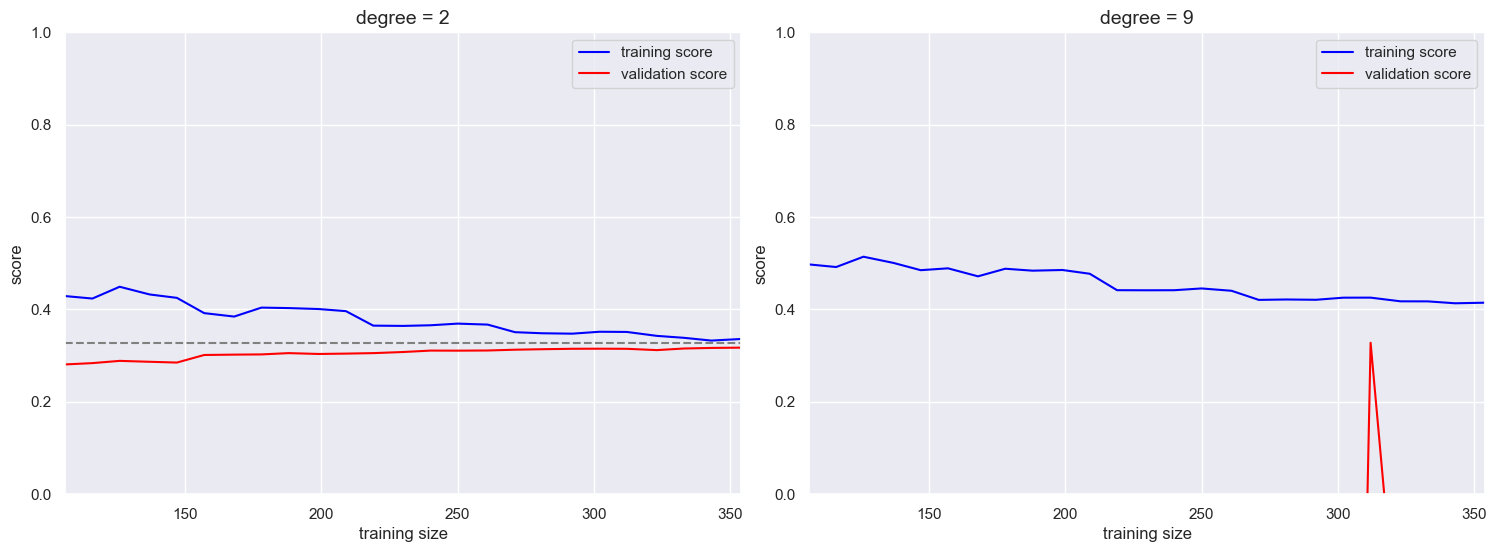

In [103]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')